# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering


Question 1

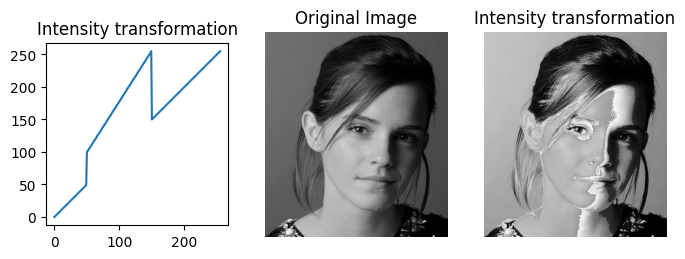

In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img= cv.imread("emma.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None
t1=np.linspace(0,50,50)
t2=np.linspace(50,100,0)
t3=np.linspace(100,255,100)
t4=np.linspace(255,150,0)
t5=np.linspace(150,255,106)
t=np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)
assert len(t) == 256
g=cv.LUT(img,t)
fig, ax= plt.subplots(1,3,figsize=(8,8))
ax[0].plot(t), ax[0].set_title("Intensity transformation"), ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Intensity transformation")
plt.show()

Question 2

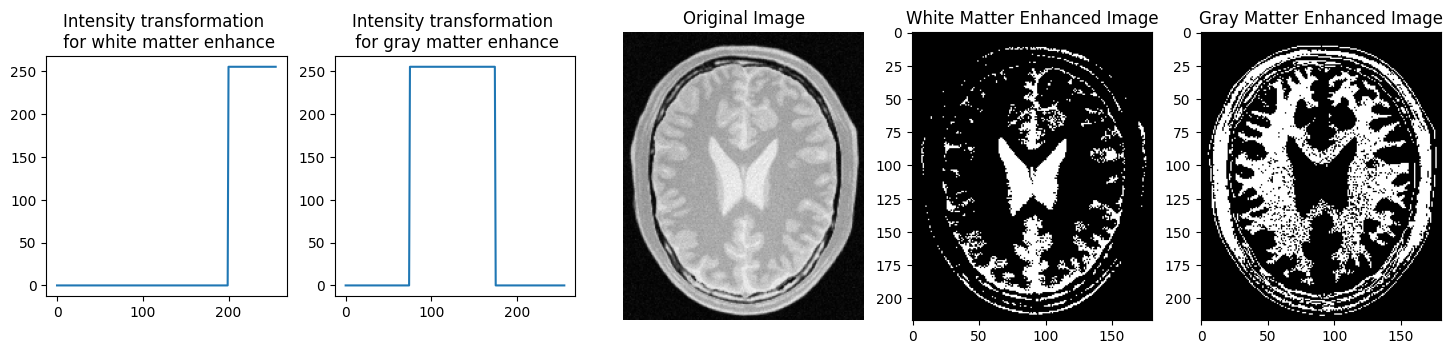

In [84]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img= cv.imread("BrainProtonDensitySlice9.png",cv.IMREAD_GRAYSCALE)
assert img is not None

t1=np.zeros(200)
t2=255*np.ones(56)
t= np.concatenate((t1,t2),axis=0).astype(np.uint8)

t3=np.zeros(75)
t4=255*np.ones(100)
t5=np.zeros(81)
T= np.concatenate((t3,t4,t5),axis=0).astype(np.uint8)

assert len(t) == 256
g=cv.LUT(img,t)
h=cv.LUT(img,T)

fig ,  ax=plt.subplots(1,5,figsize=(18,18))
ax[0].plot(t), ax[0].set_title("Intensity transformation \n for white matter enhance"), ax[0].set_aspect('equal')
ax[1].plot(T), ax[1].set_title("Intensity transformation \n for gray matter enhance") , ax[1].set_aspect('equal')
ax[2].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Original Image")
ax[3].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[3].set_title("White Matter Enhanced Image")
ax[4].imshow(cv.cvtColor(h,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[4].set_title("Gray Matter Enhanced Image")
plt.show()


Question  3

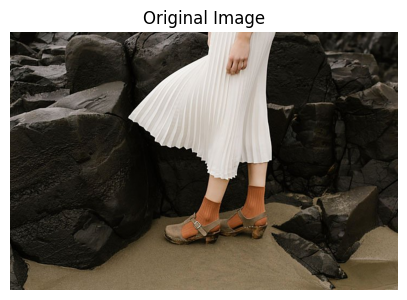

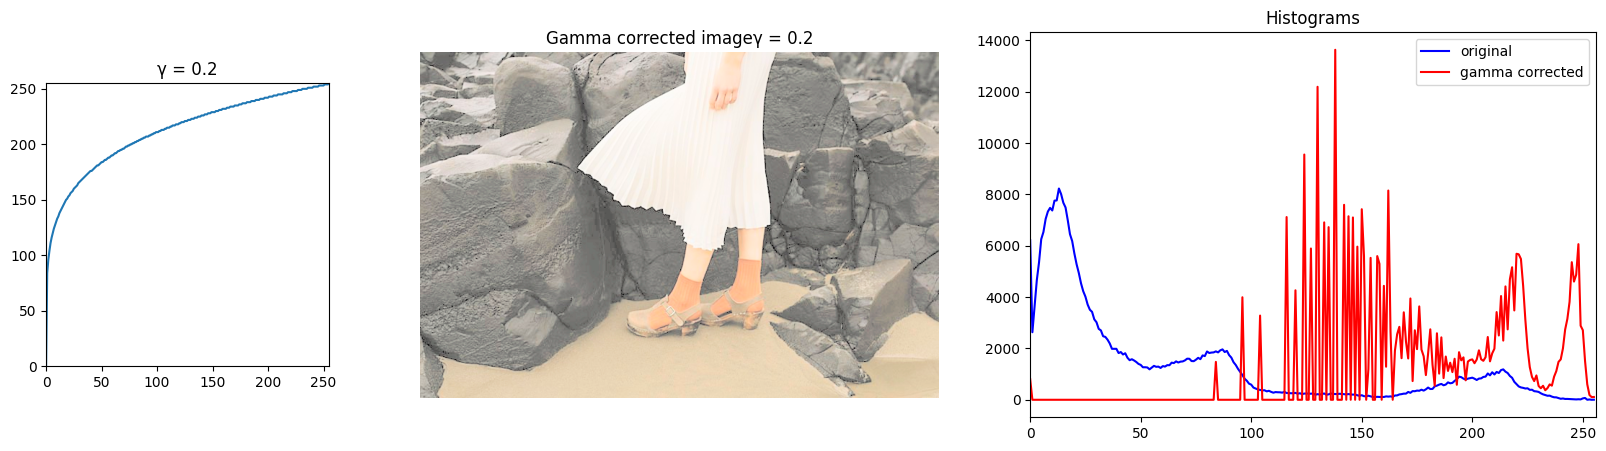

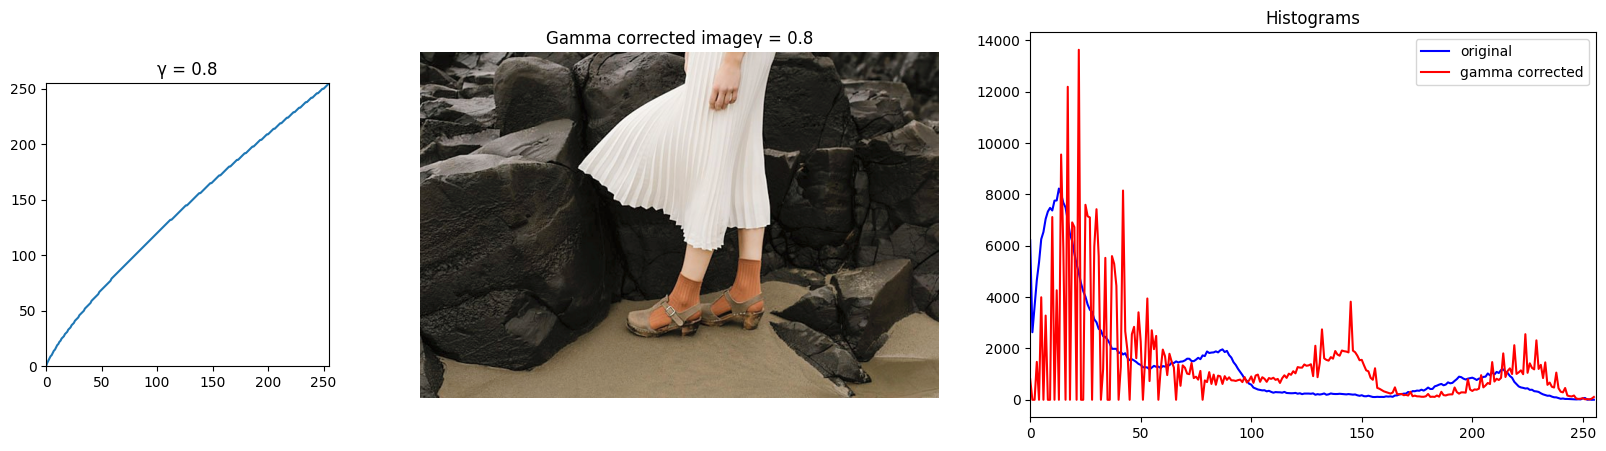

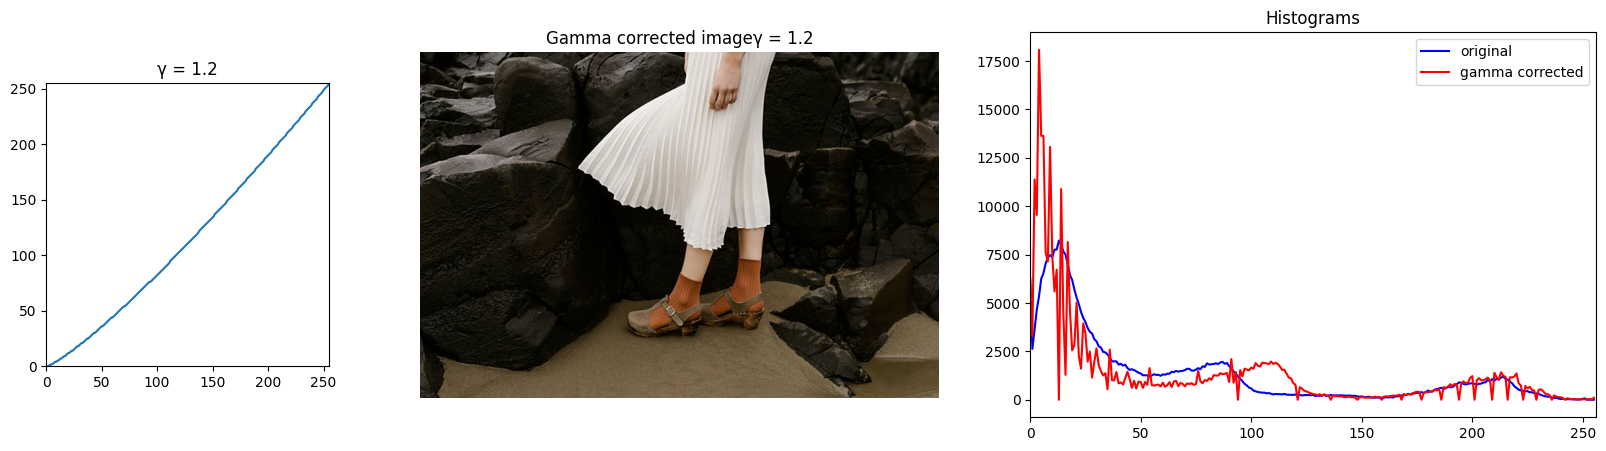

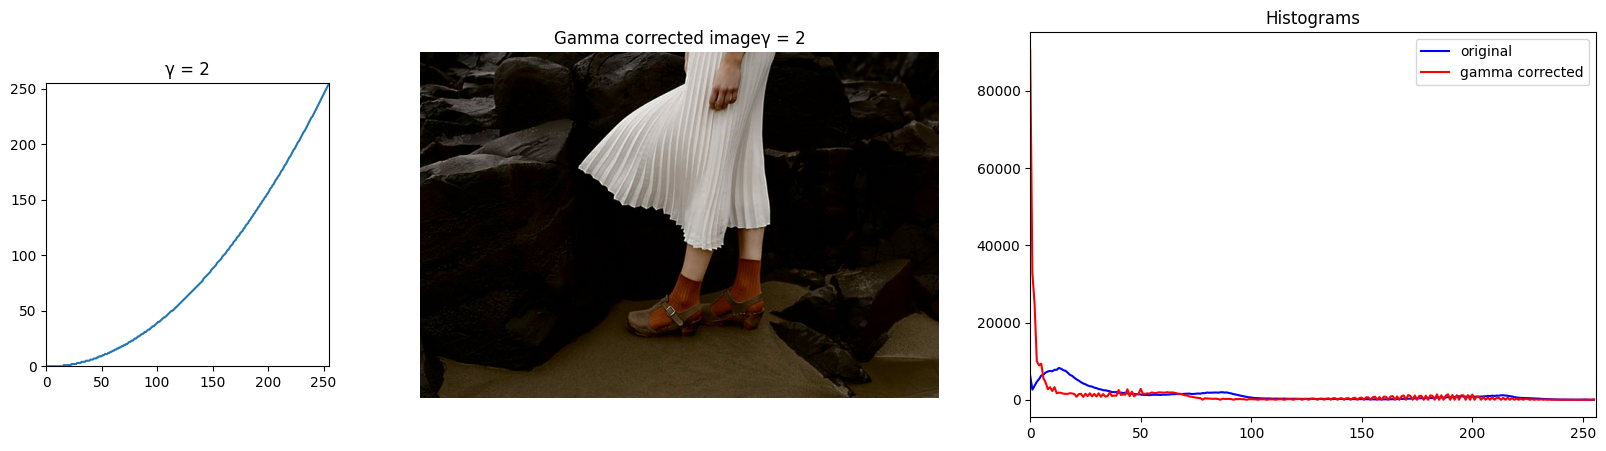

In [115]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("highlights_and_shadows.jpg")
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB))
gamma = [0.2, 0.8, 1.2, 2]
plt.figure(figsize=(5, 5)) ,plt.imshow(cv.cvtColor(img,cv.COLOR_RGB2BGR))  ,plt.axis('off') ,plt.title("Original Image") 

for i in gamma :
    table = np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8)
    img_gamma = cv.LUT(L, table)
    corrected_img = cv.merge([img_gamma, a, b])
    hist_orig = cv.calcHist([img], [0], None, [256], [0, 256])
    hist_gamma = cv.calcHist([corrected_img], [0], None, [256], [0, 256])

    fig, ax = plt.subplots(1, 3, figsize=(20, 5), gridspec_kw={'width_ratios': [0.6, 1.1, 1.2]})
    ax[0].plot(table),ax[0].set_title("\u03B3 = "+ str(i)) ,ax[0].set_xlim(0, 255),ax[0].set_ylim(0, 255),ax[0].set_aspect('equal')
    ax[1].imshow(cv.cvtColor(corrected_img,cv.COLOR_LAB2RGB)), ax[1].axis('off'), ax[1].set_title("Gamma corrected image"+"\u03B3 = "+ str(i))
    ax[2].plot(hist_orig, color='b'),  plt.xlim([0,256]), plt.legend(('original','gamma corrected'),loc='upper right')
    ax[2].plot(hist_gamma, color='r'),  plt.xlim([0,256]), plt.legend(('original','gamma corrected'),loc='upper right') ,ax[2].set_title("Histograms")
    

When gamma value is equal to 1, it gives the same image as the original image. But when gamma value is less than 1 and decreasing, it increases the brighness of the image. Likewise while the gamma value is greater than 1 and increasing it increases the darkness of the original image. We can see this behaviour through the plotted histograms as well. The histogram of the gamma corrected image moves to the left side of the plot due to the increase in the dark intensities of the original image with the increasing gamma value.

Question  4

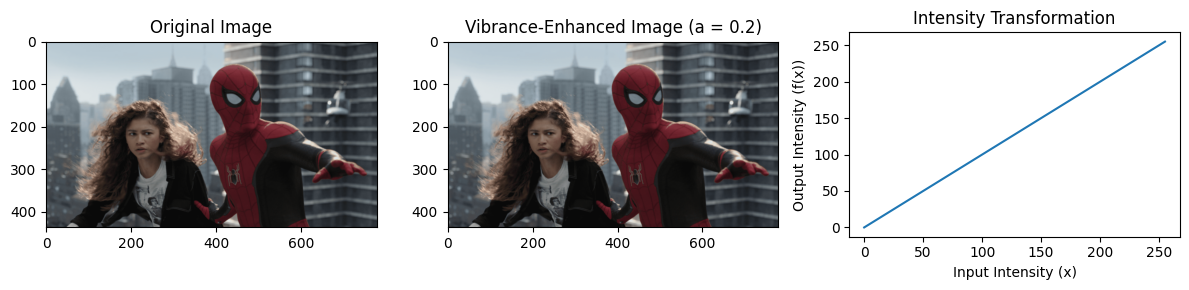

In [158]:
import cv2 as cv
import math
import numpy as np
import matplotlib.pyplot as plt
img_orig = cv.imread('spider.png', cv.IMREAD_COLOR)
img1=cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)
hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)
assert img is not None
def transform(x, a, sigma):
    return min((x+(a/128)*math.exp(-((x-128)**2)/(2*(sigma**2)))),255)
a=0.2
table = np.array([transform(i,0,7)for i in np.arange(0, 256)]).astype('uint8')
s_t=cv.LUT(s,table)
s_t_resized = cv.resize(s_t, (h.shape[1], h.shape[0]))
image_merge = cv.merge([h, s_t_resized, v])
img_rgb = cv.cvtColor(image_merge, cv.COLOR_HSV2RGB)
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(img_rgb)
plt.title("Vibrance-Enhanced Image (a = {})".format(a))

# Visualize the intensity transformation
x = np.arange(256) 
plt.subplot(1, 3, 3)
plt.plot(x,table)
plt.title("Intensity Transformation")
plt.xlabel("Input Intensity (x)")
plt.ylabel("Output Intensity (f(x))")

plt.tight_layout()
plt.show()

Question  5

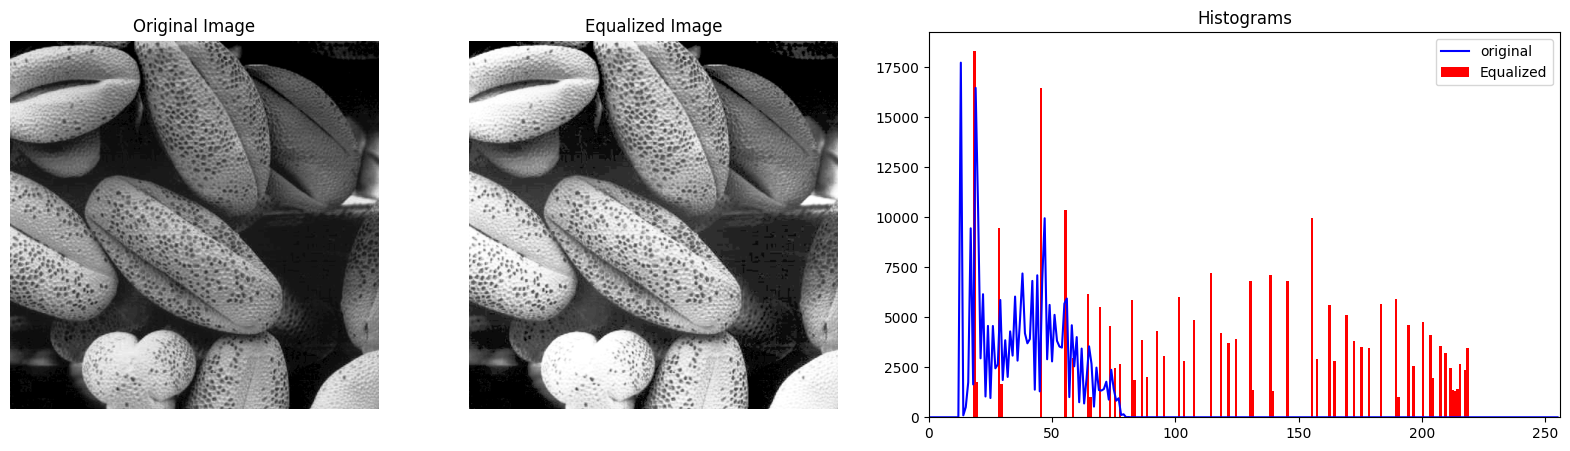

In [140]:
import numpy as np
import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib
import cv2 as cv
img_org= cv.imread("shells.tif", cv.IMREAD_GRAYSCALE)
img = cv.imread("shells.tif", cv.IMREAD_GRAYSCALE)
hist_orig = cv.calcHist([img], [0], None, [256], [0, 256])

rows = img.shape[0] 
cols = img.shape[1]
arr1 = np.zeros((256,), dtype=np.uint16)
arr2 = np.zeros((256,), dtype=np.uint16)

for i in range(rows):
    for j in range(cols):
        g = img[i,j]
        arr1[g] += 1

for i in range(256):
    for j in range(i+1):
        arr2[i] += arr1[j]*(255/(rows*cols))
    arr2[i] = round(arr2[i],0)
arr2 = arr2.astype(np.uint16)

for i in range(rows):
    for j in range(cols):
        g = img[i,j]
        img[i,j] = arr2[g]

fig, ax = plt.subplots(1, 3, figsize=(20, 5), gridspec_kw={'width_ratios': [0.7, 0.7, 1.2]})
ax[0].imshow(img_org, cmap='gray')   ,ax[0].axis('off'),ax[0].set_title("Original Image")
ax[1].imshow(img, cmap='gray')   ,ax[1].axis('off'),ax[1].set_title("Equalized Image")
ax[2].plot(hist_orig, color='b'),ax[2].set_xlim([0, 256]),ax[2].legend(('original', 'Equalized'), loc='upper right')   ,ax[2].set_title("Histograms")
ax[2].hist(img.flatten(), 256, [0, 256], color='r')   ,ax[2].set_xlim([0, 256]),ax[2].legend(('original', 'Equalized'), loc='upper right')
plt.show()  


Question  6

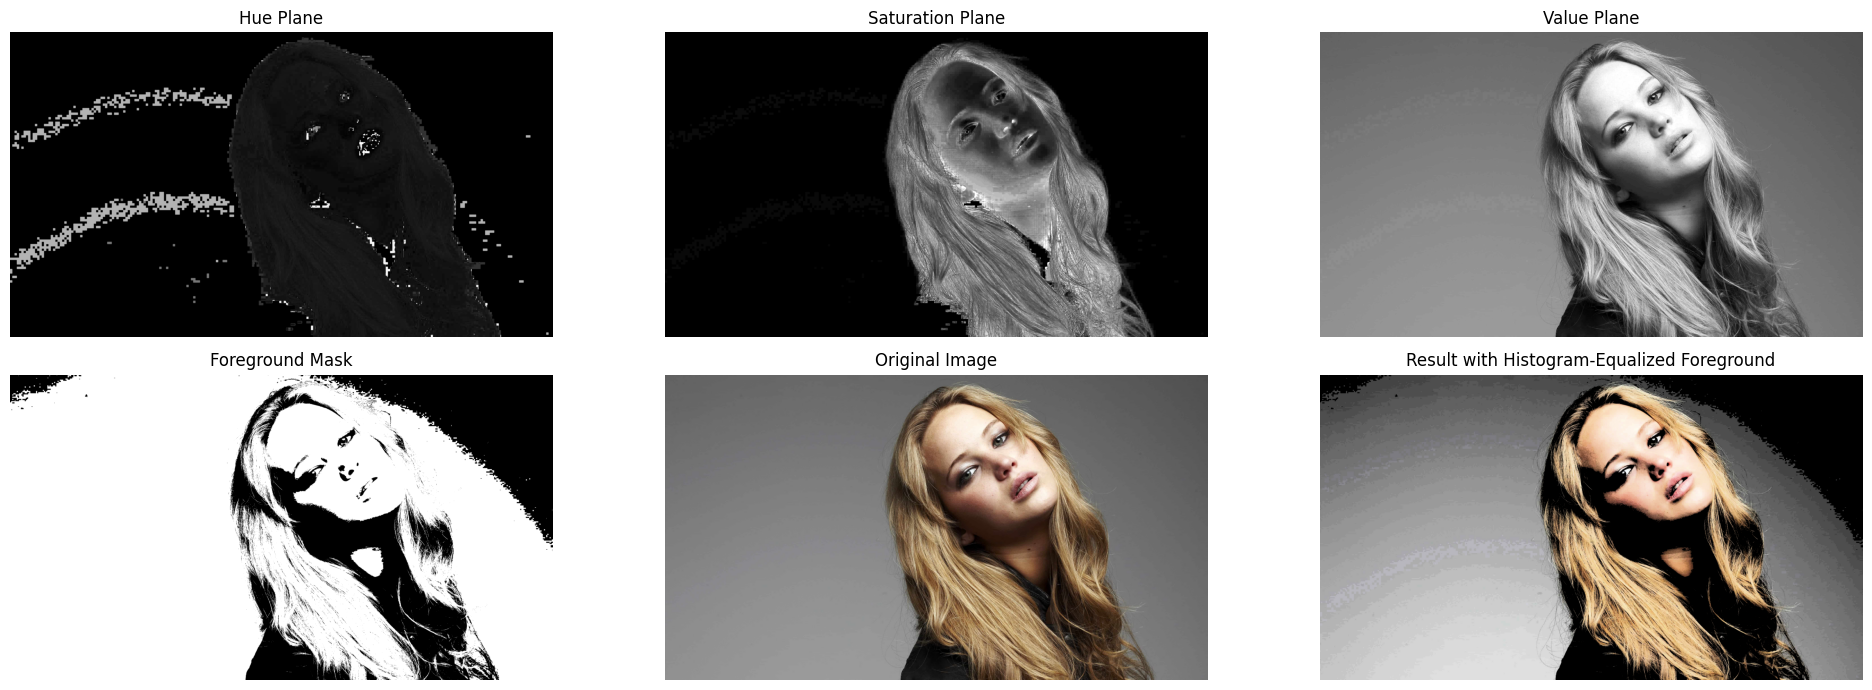

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('jeniffer.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for accurate display

image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

hue, saturation, value = cv2.split(image_hsv)

threshold_value = 100
_, foreground_mask = cv2.threshold(value, threshold_value, 255, cv2.THRESH_BINARY)

foreground = cv2.bitwise_and(value, value, mask=foreground_mask)

hist = cv2.calcHist([foreground], [0], None, [256], [0, 256])
cumulative_sum = np.cumsum(hist)
equalized_values = (cumulative_sum[foreground] / cumulative_sum[255]) * 255
equalized_values = equalized_values.astype(np.uint8)
equalized_value_plane = np.zeros_like(value)
equalized_value_plane[foreground_mask > 0] = equalized_values[foreground_mask > 0]
equalized_image_hsv = cv2.merge((hue, saturation, equalized_value_plane))
equalized_image_rgb = cv2.cvtColor(equalized_image_hsv, cv2.COLOR_HSV2RGB)

fig, ax = plt.subplots(2, 3, figsize=(20, 7))
ax[0, 0].imshow(hue, cmap='gray'), ax[0, 0].axis('off'), ax[0, 0].set_title("Hue Plane")
ax[0, 1].imshow(saturation, cmap='gray'), ax[0, 1].axis('off'), ax[0, 1].set_title("Saturation Plane")
ax[0, 2].imshow(value, cmap='gray'), ax[0, 2].axis('off'), ax[0, 2].set_title("Value Plane")
ax[1, 0].imshow(foreground_mask, cmap='gray'), ax[1, 0].axis('off'), ax[1, 0].set_title("Foreground Mask")
ax[1, 1].imshow(image_rgb), ax[1, 1].axis('off'), ax[1, 1].set_title("Original Image")
ax[1, 2].imshow(equalized_image_rgb), ax[1, 2].axis('off'), ax[1, 2].set_title("Result with Histogram-Equalized Foreground")
plt.tight_layout()
plt.show()


Question  7

(<matplotlib.image.AxesImage at 0x2acc32ce1d0>,
 Text(0.5, 1.0, 'Gradiant Magnitude'))

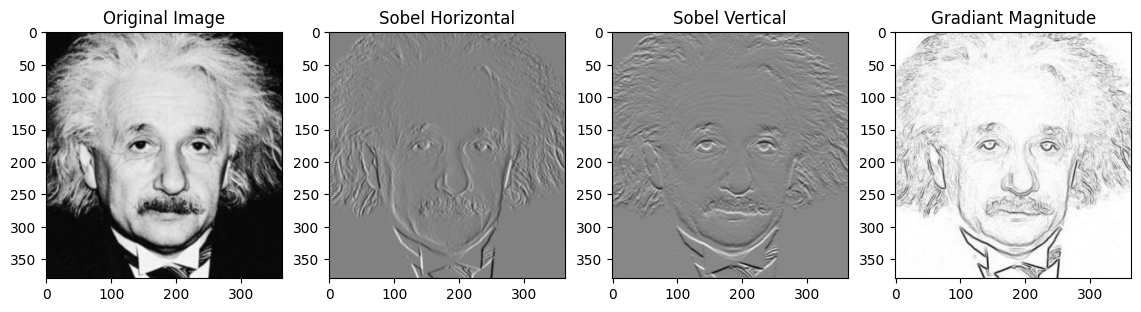

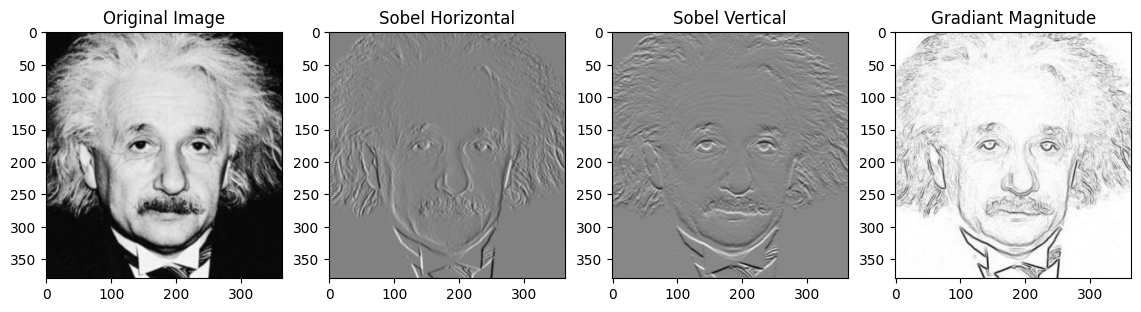

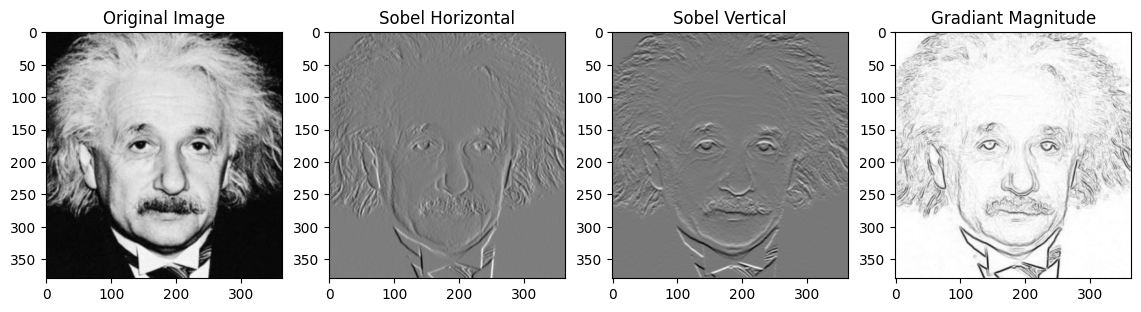

In [37]:
# Question 7 (a)
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread("einstein.png",cv.IMREAD_GRAYSCALE).astype(np.float32)
transform = np.arange(255, -1, -1).astype('uint8')
H_So = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
V_So = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
Mag_Gradient1 = np.sqrt(H_So**2+V_So**2)
Mag_Gradient1 = cv.normalize(Mag_Gradient1, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
Mag_Gradient= cv.LUT(Mag_Gradient1, transform)
fig , ax= plt.subplots(1,4,figsize=(14,5))
ax[0].imshow(img,cmap="gray"), ax[0].set_title('Original Image')
ax[1].imshow(H_So,cmap="gray"),ax[1].set_title('Sobel Horizontal')
ax[2].imshow(V_So,cmap="gray"),ax[2].set_title('Sobel Vertical')
ax[3].imshow(Mag_Gradient,cmap="gray"),ax[3].set_title('Gradiant Magnitude')

# Question 7 (b)
kernel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype='float')
kernel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype='float')
imh=cv.filter2D(img,-1,kernel_h)
imv=cv.filter2D(img,-1,kernel_v)
Mag_Gradient2 = np.sqrt(H_So**2+V_So**2)
Mag_Gradient2 = cv.normalize(Mag_Gradient2, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
Mag_gradient= cv.LUT(Mag_Gradient2, transform)
fig , ax= plt.subplots(1,4,figsize=(14,5))
ax[0].imshow(img,cmap="gray"), ax[0].set_title('Original Image')
ax[1].imshow(imh,cmap="gray"),ax[1].set_title('Sobel Horizontal')
ax[2].imshow(imv,cmap="gray"),ax[2].set_title('Sobel Vertical')
ax[3].imshow(Mag_gradient,cmap="gray"),ax[3].set_title('Gradiant Magnitude')

# Question 7 (c)
kernel_v=np.array([1,2,1],dtype='float')
kernel_h=np.array([1,0,-1],dtype='float')
imh=cv.sepFilter2D(img,-1,kernel_h,kernel_v)
imv=cv.sepFilter2D(img,-1,kernel_v,kernel_h)
Mag_Gradient2 = np.sqrt(H_So**2+V_So**2)
Mag_Gradient2 = cv.normalize(Mag_Gradient2, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
Mag_gradient= cv.LUT(Mag_Gradient2, transform)
fig , ax= plt.subplots(1,4,figsize=(14,5))
ax[0].imshow(img,cmap="gray"), ax[0].set_title('Original Image')
ax[1].imshow(imh,cmap="gray"),ax[1].set_title('Sobel Horizontal')
ax[2].imshow(imv,cmap="gray"),ax[2].set_title('Sobel Vertical')
ax[3].imshow(Mag_gradient,cmap="gray"),ax[3].set_title('Gradiant Magnitude')


Question  8

Question  9